In [44]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import collections

### 1. Gráf beolvasása

##### https://snap.stanford.edu/data/ca-GrQc.html

In [111]:
df=pd.read_csv("musae_ENGB_edges.csv",delimiter=",")

In [112]:
G=nx.from_pandas_edgelist(df,"from","to")

In [113]:
# Alap info:
print(nx.info(G))
# Kézzel:
print(G.number_of_nodes())
print(G.number_of_edges())

Name: 
Type: Graph
Number of nodes: 7126
Number of edges: 35324
Average degree:   9.9141
7126
35324


#### 1.1 Connected, úgyhogy lehet átmérőt számolni

In [115]:
nx.is_connected(G)

True

#### 1.2 Átmérő

In [114]:
nx.diameter(G)

10

#### 1.3 Átlagos legrövidebb út

##### https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html

In [158]:
print(nx.average_shortest_path_length(G))

3.6776157289097005


### 2. DF

In [117]:
group_by1=df.groupby(["from"]).count().sort_values(by=["to"],ascending=False)

#### 2.1 Átlagos fokszám

In [120]:
print(np.average(group_by1["to"]))

6.4850376353956305

#### 2.2 Fekszámeloszlás

In [154]:
np.max(group_by1["to"])

540

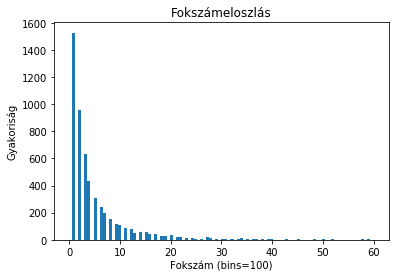

In [159]:
plt.hist(group_by1["to"], density=False, range=(0,60), bins=100)
plt.title("Fokszámeloszlás")
plt.xlabel("Fokszám (bins=100)")
plt.ylabel("Gyakoriság")
plt.show()

##### A Barabási-féle skálafüggetlen hálózathoz hasonlót látunk, a fokszámeloszlás kb a hatványtörvényt követi. Az x tengely az élek számát (k), az y tengely a k darab éllel rendelkező csomópontok számát mutatja.